In [1]:
# %%
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import boxcox

In [2]:
# Load the dataset
file_path = "../data/nberces5818v1_n2012.csv"
req_naics = 336111
df = pd.read_csv(file_path)
df = df[df['naics'] == req_naics].reset_index(drop=True)
df.head()

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,equip,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4
0,336111,1958,146.1,868.4,116.2,229.7,650.6,5007.9,3411.3,1563.8,...,3291.1,11718.8,0.314,0.238,0.180,0.147,NaN,0.553,NaN,0.550
1,336111,1959,160.6,1072.6,131.0,283.2,827.2,6422.2,4306.7,2143.4,...,3457.5,11415.6,0.322,0.243,0.184,0.145,0.052,0.583,0.053,0.580
2,336111,1960,176.1,1183.7,144.7,302.8,925.7,7239.0,4883.5,2336.2,...,3673.0,11375.1,0.318,0.241,0.190,0.150,0.030,0.601,0.030,0.598
3,336111,1961,152.4,1035.7,123.2,252.9,789.5,6214.2,4134.9,2053.6,...,3794.2,11179.9,0.317,0.242,0.190,0.146,-0.007,0.596,-0.009,0.592
4,336111,1962,168.2,1223.6,138.4,297.1,954.7,7855.3,5187.9,2671.2,...,3908.1,11141.2,0.315,0.246,0.193,0.147,0.077,0.644,0.078,0.641


In [3]:
df["naics"].unique()

array([336111])

In [4]:
df['year'].min(), df['year'].max()

(1958, 2018)

In [5]:
# Display basic info about the dataset
# df.info()

# Check for missing values
missing_values = df.isnull().sum()

print(missing_values)

naics      0
year       0
emp        0
pay        0
prode      0
prodh      0
prodw      0
vship      0
matcost    0
vadd       0
invest     1
invent     0
energy     0
cap        2
equip      2
plant      2
piship     0
pimat      0
piinv      2
pien       0
dtfp5      3
tfp5       2
dtfp4      3
tfp4       2
dtype: int64


In [6]:
# Summary statistics
summary_stats = df.describe()

print(summary_stats)
df.set_index('year', inplace=True)

          naics         year         emp          pay       prode       prodh  \
count      61.0    61.000000   61.000000    61.000000   61.000000   61.000000   
mean   336111.0  1988.000000  124.024590  4032.357377  103.673770  213.665574   
std         0.0    17.752934   43.676266  1777.004432   35.489378   77.599989   
min    336111.0  1958.000000   51.800000   868.400000   44.200000   88.300000   
25%    336111.0  1973.000000   82.400000  2142.800000   71.100000  143.100000   
50%    336111.0  1988.000000  118.900000  4774.500000  101.100000  209.400000   
75%    336111.0  2003.000000  160.600000  5352.100000  132.200000  281.100000   
max    336111.0  2018.000000  214.200000  6672.100000  178.700000  381.900000   

             prodw          vship        matcost          vadd  ...  \
count    61.000000      61.000000      61.000000     61.000000  ...   
mean   3259.647541   56029.781967   41567.060656  14477.124590  ...   
std    1465.632473   37591.482877   28807.927354   9313.0

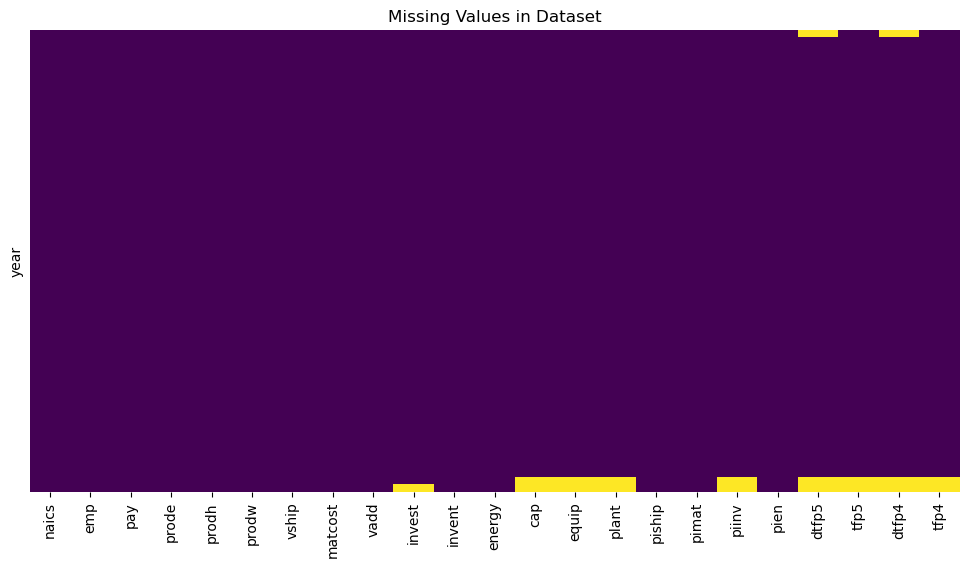

In [7]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

In [8]:
# imputation_cols = ['invest', 'cap', 'equip', 'plant', 'piinv', 'dtfp5', 'dtfp4', 'tfp5', 'tfp4']
# window_size= 5
# df[imputation_cols] = df[imputation_cols].rolling(window_size, min_periods=1).median()
# # df[imputation_cols] = df[imputation_cols].fillna(df[imputation_cols].median())


In [9]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
# plt.title("Missing Values in Dataset")
# plt.xlabel("Columns")
# plt.ylabel("Year")
# plt.show()

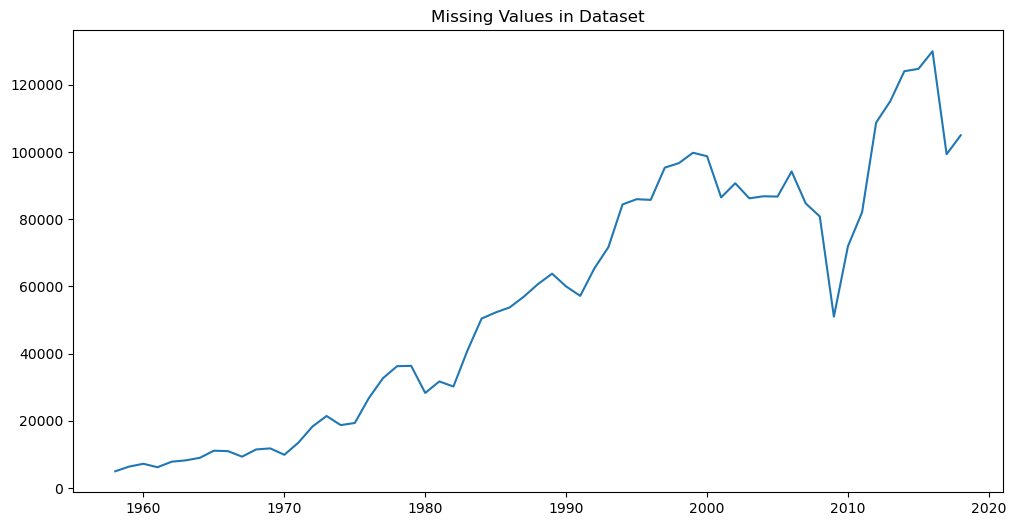

In [10]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
plt.plot(df['vship'])
plt.title("Missing Values in Dataset")
plt.show()

In [11]:
df.to_csv(f"../data/processed_data_{req_naics}.csv")